In [1]:
import numpy as np
from keras.utils import to_categorical

import glob
import cv2 
import math

import face_recognition as fr

from scipy.linalg import svd
from numpy import linalg as LA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import os

%matplotlib inline

Using TensorFlow backend.


In [2]:
dim_img = [50,50]




In [3]:
path = glob.glob("D:/ML Dataset/RGB_face_Aug/*.png")

# Rading dataset
X = []

    
for img in path:
    if "RGB" in img:
        n = cv2.imread(img)
        gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray,(dim_img[0],dim_img[1]))
        X.append(gray)





In [4]:
n = cv2.imread(path[0])

#plt.imshow(n)

n.dtype
gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)

In [5]:
Y = np.zeros((len(X)))
i=0
for img in path:
    if "RGB" in img:
        if "_Male_" in img: 
            #print(row["filename"])
            Y[i]  = 0
        else:
            Y[i]  = 1 
        i = i+1

In [6]:
# Convert List dataset into array
X = np.array(X)

In [7]:
len(X),len(Y)

(4980, 4980)

In [8]:
# # Reading Annotation file of Gender
# Gender = pd.read_csv('D:/ML_New/Annotations/Train_Gender.txt', sep=" ", header=None)
# Gender.columns = ["filename", "gender"]


In [9]:

    
#Y = np.matrix(Gender).T

In [10]:
Y_one_hot = to_categorical(Y)

In [11]:
Y_one_hot,Y

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.]))

In [12]:
X = X.astype('float32')
X = X / 255

X = X.reshape(-1,dim_img[0],dim_img[1], 1)
X.shape

(4980, 50, 50, 1)

In [13]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X, Y_one_hot, test_size=0.1, random_state=13)
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((4482, 50, 50, 1), (498, 50, 50, 1), (4482, 2), (498, 2))

In [14]:
train_X,valid_X,train_Y,valid_Y = train_test_split(train_X, train_Y, test_size=0.15, random_state=13)
train_X.shape,valid_X.shape,train_Y.shape,valid_Y.shape

((3809, 50, 50, 1), (673, 50, 50, 1), (3809, 2), (673, 2))

In [15]:
# data = pd.read_csv('D:/ML Dataset/Annotations/Train_Roll_Number.txt', sep=" ", header=None)
# data1 = pd.read_csv('D:/ML Dataset/Annotations/Train_RGB_Sketch.txt', sep=" ", header=None)
# data2 = pd.read_csv('D:/ML Dataset/Annotations/Train_Gender.txt', sep=" ", header=None)
# data3 = pd.read_csv('D:/ML Dataset/Annotations/Train_Expression.txt', sep=" ", header=None)


In [16]:

# data.columns = ["filename", "subject"]
# data1.columns = ["filename", "sketch"]
# data2.columns = ["filename", "gender"]
# data3.columns = ["filename", "expression"]


# **Model the Data**

In [45]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [46]:
batch_size = 120
epochs = 15
num_classes = 2

In [47]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(dim_img[0],dim_img[1],1)))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='valid'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='valid'))
#model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(2048, activation='linear'))
#model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(128, activation='linear'))
#model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(32, activation='linear'))
#model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 128)         73856     
__________

In [49]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [50]:
train_dropout = model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y))

Train on 3809 samples, validate on 673 samples
Epoch 1/15
3809/3809 [==============================] - 31s 8ms/step - loss: 0.7969 - acc: 0.7073 - val_loss: 0.4576 - val_acc: 0.8024
Epoch 2/15
3809/3809 [==============================] - 29s 8ms/step - loss: 0.4115 - acc: 0.8438 - val_loss: 0.4446 - val_acc: 0.7890
Epoch 3/15
3809/3809 [==============================] - 29s 8ms/step - loss: 0.3538 - acc: 0.8679 - val_loss: 0.3104 - val_acc: 0.8767
Epoch 4/15
3809/3809 [==============================] - 29s 8ms/step - loss: 0.3023 - acc: 0.8892 - val_loss: 0.2555 - val_acc: 0.9034
Epoch 5/15
3809/3809 [==============================] - 29s 8ms/step - loss: 0.2680 - acc: 0.8937 - val_loss: 0.2109 - val_acc: 0.9183
Epoch 6/15
3809/3809 [==============================] - 29s 8ms/step - loss: 0.2287 - acc: 0.9084 - val_loss: 0.1655 - val_acc: 0.9331
Epoch 7/15
3809/3809 [==============================] - 29s 8ms/step - loss: 0.1846 - acc: 0.9294 - val_loss: 0.1713 - val_acc: 0.9435
Epoch 8/

In [51]:
model.save("CNN_Gender_RGB.h5")

In [52]:
test_eval = model.evaluate(test_X, test_Y, verbose=1)

498/498 [==============================] - 1s 2ms/step


In [53]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.028733764286994576
Test accuracy: 0.9859437751004017


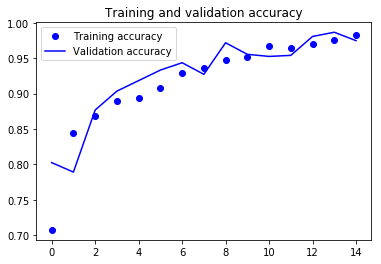

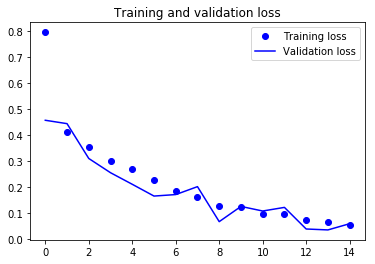

In [54]:
accuracy = train_dropout.history['acc']
val_accuracy = train_dropout.history['val_acc']
loss = train_dropout.history['loss']
val_loss = train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [55]:
predicted_classes = model.predict(test_X)

In [56]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [57]:
test_Y_Pre = np.argmax(np.round(test_Y),axis=1)

In [58]:
predicted_classes.shape, test_Y_Pre.shape

((498,), (498,))

Found 491 correct labels


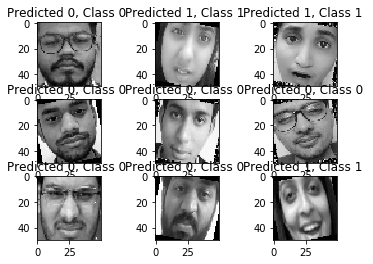

In [59]:
correct = np.where(predicted_classes==test_Y_Pre)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(dim_img[0],dim_img[1]), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {} ".format(predicted_classes[correct], np.argmax(test_Y[correct])))
    

Found 7 incorrect labels


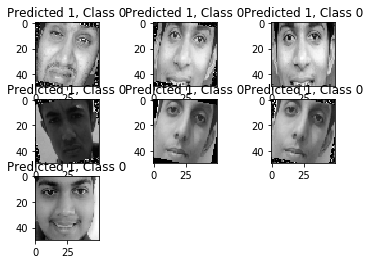

In [60]:
incorrect = np.where(predicted_classes!=test_Y_Pre)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(dim_img[0],dim_img[1]), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], np.argmax(test_Y[incorrect])))
    

In [61]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y_Pre, predicted_classes, target_names=target_names))
 

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99       339
     Class 1       0.96      1.00      0.98       159

   micro avg       0.99      0.99      0.99       498
   macro avg       0.98      0.99      0.98       498
weighted avg       0.99      0.99      0.99       498



# Real Time

In [62]:

# import cv2
# import numpy as np
# from matplotlib import pyplot as plt

  
# # capture frames from a camera 
# cap = cv2.VideoCapture(0)    
  
# # loop runs if capturing has been initialized 
# while(1): 
  
#     # reads frames from a camera 
#     ret, frame = cap.read() 
  
#     # converting BGR to HSV 
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
      
#     # define range of red color in HSV 
#     lower_red = np.array([30,150,50]) 
#     upper_red = np.array([255,255,180]) 
      
#     # create a red HSV colour boundary and  
#     # threshold HSV image 
#     mask = cv2.inRange(hsv, lower_red, upper_red) 
  
#     # Bitwise-AND mask and original image 
#     res = cv2.bitwise_and(frame,frame, mask= mask) 
  
#     # Display an original image 
#     cv2.imshow('Original',np.fliplr(frame)) 
  
#     # finds edges in the input image image and 
#     # marks them in the output map edges 
#     edges = cv2.Canny(frame,100,200) 
  
#     # Display edges in a frame 
#     cv2.imshow('Edges',np.fliplr(edges)) 
  
#     # Wait for Esc key to stop 
#     k = cv2.waitKey(5) & 0xFF
#     if k == 27: 
#         break
  
  
 
# cap.release() 
  
# # De-allocate any associated memory usage 
# cv2.destroyAllWindows()    

In [63]:

# import cv2
# import numpy as np
# from matplotlib import pyplot as plt

# cascPath = "haarcascade_frontalface_default.xml"
# faceCascade = cv2.CascadeClassifier(cascPath)


# # capture frames from a camera 
# cap = cv2.VideoCapture(0)    
  
# # loop runs if capturing has been initialized 
# while(1): 
  
#     # reads frames from a camera 
#     ret, frame = cap.read() 
  
#     # converting BGR to HSV 
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
      
#     # define range of red color in HSV 
#     lower_red = np.array([30,150,50]) 
#     upper_red = np.array([255,255,180]) 
      
#     # create a red HSV colour boundary and  
#     # threshold HSV image 
#     mask = cv2.inRange(hsv, lower_red, upper_red) 
  
#     # Bitwise-AND mask and original image 
#     res = cv2.bitwise_and(frame,frame, mask= mask) 
  

#     cv2.imshow('Original',frame) 
    
#     # Detect faces in the image
#     faces = faceCascade.detectMultiScale(
#         frame,
#         scaleFactor=1.2,
#         minNeighbors=5,
#     )

    
#     ax = list(range(x,x+w))
#     ay = list(range(y,y+h))
#     img = frame[np.ix_(ay,ax)]

    
#     if len(faces) == 1:

        
#         for (x, y, w, h) in faces:
#             cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 5)


#         img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#         img = cv2.resize(img,(dim_img[0],dim_img[1]))

#         test_X = img.astype('float32')
#         test_X = test_X / 255
#         test_X = test_X.reshape(-1,dim_img[0],dim_img[1], 1)

#         predicted_classes = model.predict(test_X)
#         predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


#         if predicted_classes==0: 
#             cv2.putText(frame,"Male",(x,y),cv2.FONT_HERSHEY_SIMPLEX,3,(0,0,255),2)
#         else:
#             cv2.putText(frame,"Female",(x,y),cv2.FONT_HERSHEY_SIMPLEX,3,(0,0,255),2)


#         # Display an original image 
#         cv2.imshow('Original',frame) 

    
#         # Wait for Esc key to stop 
#         k = cv2.waitKey(5) & 0xFF
#         if k == 27: 
#             break
  
  

# cap.release() 
  
# # De-allocate any associated memory usage 
# cv2.destroyAllWindows()    

In [64]:


# import cv2
# import numpy as np
# from matplotlib import pyplot as plt


# hogFaceDetector = dlib.get_frontal_face_detector()
# width = dim_img[0]
# height =dim_img[1]



# # capture frames from a camera 
# cap = cv2.VideoCapture(0)    
  
# loop runs if capturing has been initialized 
# while(1): 
  
#     # reads frames from a camera 
#     ret, frame = cap.read()   
#     # converting BGR to HSV 
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
#     # define range of red color in HSV 
#     lower_red = np.array([30,150,50]) 
#     upper_red = np.array([255,255,180]) 
#     # create a red HSV colour boundary and  
#     # threshold HSV image 
#     mask = cv2.inRange(hsv, lower_red, upper_red) 
#     # Bitwise-AND mask and original image 
#     res = cv2.bitwise_and(frame,frame, mask= mask) 
  
    
#     faceRects = hogFaceDetector(frame, 0)
#     for faceRect in faceRects:
#         x1 = faceRect.left()
#         y1 = faceRect.top()
#         x2 = faceRect.right()
#         y2 = faceRect.bottom()
#     img = frame[y1:y2,x1:x2]
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     img = cv2.resize(img,(height,width))
    

#     test_X = img.astype('float32')
#     test_X = test_X / 255
#     test_X = test_X.reshape(-1,dim_img[0],dim_img[1], 1)
 
#     predicted_classes = model.predict(test_X)
#     predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    
    
# #     if predicted_classes==0: 
# #         cv2.putText(frame,"Male",(x,y),cv2.FONT_HERSHEY_SIMPLEX,3,(0,0,255),2)
# #     else:
# #         cv2.putText(frame,"Female",(x,y),cv2.FONT_HERSHEY_SIMPLEX,3,(0,0,255),2)
        
    
#     # Display an original image 
#     cv2.imshow('Original',frame) 
    
    
#     # Wait for Esc key to stop 
#     k = cv2.waitKey(5) & 0xFF
#     if k == 27: 
#         break
  
  

# cap.release() 
  
# # De-allocate any associated memory usage 
# cv2.destroyAllWindows()    


In [65]:

# import cv2
# import numpy as np
# from matplotlib import pyplot as plt
# import faceRecognition as fr

  
# # capture frames from a camera 
# video = cv2.VideoCapture(0)    
  
# while True:
#     ret,img = video.read()
#     faces_detected, gray_img = fr.faceDetection(img)
#     #faces=face_cascade.detectMultiScale(gray_img,1.3,5)


#     #name={2:"Yagnesh",3:"Yash Gnagar",5:"Ayush P",6:"jainam",7:"Het",10:"param",11:"Jay S",13:"Saloni",14:"Abhishek",15:"Nisarg", 16:"Shruti",17:"Raj",20:"Ritu",21:"Abhi",23:"Vihar",25:"Kahan",26:"Prashant",27:"Bhoomi",28:"kairav",29:"maharsh",30:"Ronak",31:"Malak",34:"Hitarth",35:"Harshil",36:"manav",38:"Dhruvi",39:"Umang",40:"Akash",43:"Haard",44:"yashH",45:"Lavina",46:"Dhyey",47:"Aashka",52:"Arpita",54:"Nihar",55:"Soham",57:"taha",59:"tanmay",60:"Chaitya",61:"Purvang",62:"Parth",65:"AayushS",66:"Hastin",67:"Priyam",68:"Parshwa",69:"Anupama",71:"Freya",72:"Jinisha",73:"Sid",74:"Tejas",75:"Harsh",76:"Prashashti",77:"Richa",78:"maulik",79:"Shakir",80:"Richa2",81:"Sidhhi",82:"Noname",83:"no name1",84:"no name2",85:"no name3",86:"no name4",}#creating dictionary containing names for each label
#     gender={0:"Male",1:"Female"}
#     #emotion={1:"Sad",2:"Happy",3:"Anger",4:"Disgust"}


#     for face in faces_detected:
#         (x,y,w,h)=face
#         roi_gray=gray_img[y:y+h,x:x+h]
#         roi_gray_r = cv2.resize(roi_gray,(300,300))
#         #print(face_recognizer.predict(roi_gray))
#         print(face_recognizerGender.predict(roi_gray_r))
#         #print(face_recognizer2.predict(roi_gray))
#         #label,confidence=face_recognizer.predict(roi_gray)#predicting the label of given image
#         labelG,confidenceG=face_recognizerGender.predict(roi_gray)#predicting the label of given image
#         #label2,confidence2=face_recognizer2.predict(roi_gray)
#         #print("confidence:",confidence)
#         #print("label:",label)
#         #
#         print("confidence1:",confidenceG)
#         print("label1:",labelG)
#         #print("confidence2:",confidence2)
#         #print("label2:",label2)
#         fr.draw_rect(img,face)
#         #predicted_name=name[label]
#         predicted_gender = gender[labelG]
#         #predicted_emotion=emotion[label2]
#         # if(confidence>37):#If confidence more than 37 then don't print predicted face text on screen
#         #     continue
#         cv2.putText(img,predicted_gender,(x,y),cv2.FONT_HERSHEY_SIMPLEX,3,(0,0,255),2)
#        # cv2.putText(img,predicted_name,(x,y),cv2.FONT_HERSHEY_SIMPLEX,3,(0,0,255),2)



#     cv2.imshow("Face",img)
#     if cv2.waitKey(1)==ord('q'):
#         break
        
        
# video.release()
# cv2.destroyAllWindows()


In [66]:
       
# video.release()
# cv2.destroyAllWindows()

In [67]:

# from gtts import gTTS
# import numpy as np
# import cv2
# import os
# from keras.models import Model, Sequential
# from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
# from keras.preprocessing.image import load_img, img_to_array
# from keras.applications.imagenet_utils import preprocess_input
# from keras.preprocessing import image
# from os import listdir

# color = (67, 67, 67)
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')


# def preprocess_image(image_path):
#     img = load_img(image_path, target_size=(224, 224))
#     img = img_to_array(img)
#     img = np.expand_dims(img, axis=0)
#     img = preprocess_input(img)
#     return img

# def loadVggModel():
#     model = Sequential()
#     model.add(ZeroPadding2D((1, 1), input_shape=(224, 224, 3)))
#     model.add(Convolution2D(64, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(128, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(128, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(256, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(256, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(256, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(512, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Convolution2D(512, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     model.add(Convolution2D(4096, (7, 7), activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Convolution2D(4096, (1, 1), activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Convolution2D(2622, (1, 1)))
#     model.add(Flatten())
#     model.add(Activation('softmax'))

#     model.load_weights(r'vgg_face_weights.h5')

#     vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

#     return vgg_face_descriptor


# employee_pictures = "Dataset/TData"
# model = loadVggModel()
# #model = load_model('myModel.h5')


# employees = dict()
# dir = listdir(employee_pictures)
# for file in listdir(employee_pictures):
#     employee, extension = file.split(".")
#     if employee == 'desktop':
#         employees[employee] = model.predict(preprocess_image('Dataset/TData/%s.png' % (employee)))[0, :]

# print("employee representations retrieved successfully")
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# np.save('Dataset.npy',employees)
# #employees = np.load('Dataset.npy')
# model.save('myModel.h5')



# def findCosineSimilarity(source_representation, test_representation):
#     a = np.matmul(np.transpose(source_representation), test_representation)
#     b = np.sum(np.multiply(source_representation, source_representation))
#     c = np.sum(np.multiply(test_representation, test_representation))
#     return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
# # ------------------------

# cap = cv2.VideoCapture(0)  # webcam

# while (True):
#     ret, img = cap.read()
#     # img = cv2.resize(img, (640, 360))
#     faces = face_cascade.detectMultiScale(img, 1.3, 5)

#     for (x, y, w, h) in faces:
#         if w > 130:
#             cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image

#             detected_face = img[int(y):int(y + h), int(x):int(x + w)]  # crop detected face
#             detected_face = cv2.resize(detected_face, (224, 224))  # resize to 224x224

#             img_pixels = image.img_to_array(detected_face)
#             img_pixels = np.expand_dims(img_pixels, axis=0)
#             img_pixels /= 255

#             captured_representation = model.predict(img_pixels)[0, :]
#             found = 0
#             for i in employees:
#                 employee_name = i
#                 representation = employees[i]

#                 similarity = findCosineSimilarity(representation, captured_representation)
#                 rollNo = employee_name.split('_')[0]
#                 gender = employee_name.split('_')[1]
#                 emotion = employee_name.split('_')[2]
#                 text = rollNo + gender + emotion

#                 if (similarity < 0.30):
#                     if emotion=='Anger':
#                         color = (0, 0, 255)
#                     elif emotion == 'Happy':
#                         color = (0, 255, 0)
#                     elif emotion == 'Neutral':
#                         color = (255, 0, 0)
#                     elif emotion == 'Fear':
#                         color = (128, 0, 0)
#                     elif emotion == 'Disgust':
#                         color = (128, 128, 0)
#                     elif emotion == 'Surprise':
#                         color = (255, 255, 0)
#                     elif emotion == 'Sad':
#                         color = (128, 128, 128)

#                     """"
#                     language='en'
#                     speech = gTTS(text=text, lang=language, slow=False)
#                     speech.save('Recognised.mp3')
#                     os.system('start Recognised.mp3')
#                     """

#                     cv2.putText(img, (employee_name.split('_')[0]), (int(x + w + 15), int(y - 10)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
#                     cv2.putText(img, (employee_name.split('_')[1]), (int(x + w + 15), int(y - 35)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
#                     cv2.putText(img, (employee_name.split('_')[2]), (int(x + w + 15), int(y - 60)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
#                     found = 1
#                     isRecording = False
#                     break
#             # connect face and text
#             cv2.line(img, (int((x + x + w) / 2), y + 15), (x + w, y - 20), color, 1)
#             cv2.line(img, (x + w, y - 20), (x + w + 10, y - 20), color, 1)

#             if (found == 0):  # if found image is not in employee database
#                 cv2.putText(img, 'unknown', (int(x + w + 15), int(y - 12)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
#     cv2.imshow('img', img)

#     if cv2.waitKey(1) & 0xFF == ord('c'):  # Continue
#         isRecording = True

#     if cv2.waitKey(1) & 0xFF == ord('q'):  # press q to quit
#         break

# # kill open cv things
# cap.release()
# cv2.destroyAllWindows()